In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import graphviz
import plotly.express as px
import matplotlib.pyplot as plt
import random
from sklearn import tree
from tqdm import tqdm
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

# PROBLEM 1: tSNE dim reduction

# MNIST 

In [ ]:
# MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int')

In [ ]:
# Normalize data
X /= 255.0

In [ ]:
# Taking subset of 10,000 data points
n_samples = 10000
np.random.seed(42)
indices = np.random.choice(len(X), n_samples, replace = False)
X_sub = X[indices]
y_sub = y[indices]

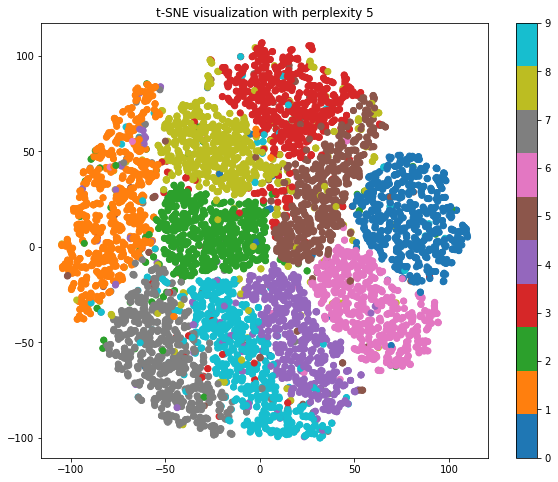

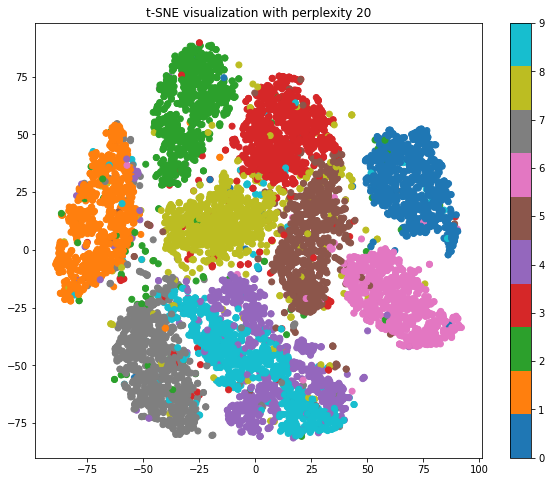

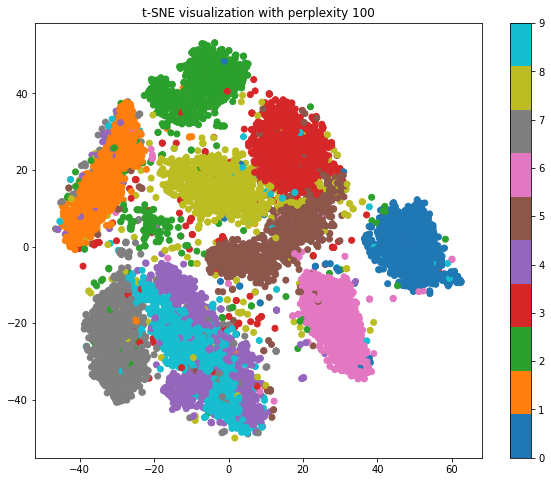

In [ ]:
perplexities = [5, 20, 100]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity = perplexity, random_state = 42)
    X_emb = tsne.fit_transform(X_sub)

    # Visualize data
    plt.figure(figsize=(10, 8))
    plt.scatter(X_emb[:, 0], X_emb[:, 1], c = y_sub, cmap ='tab10')
    plt.title(f't-SNE visualization with perplexity {perplexity}')
    plt.colorbar()
    plt.show()

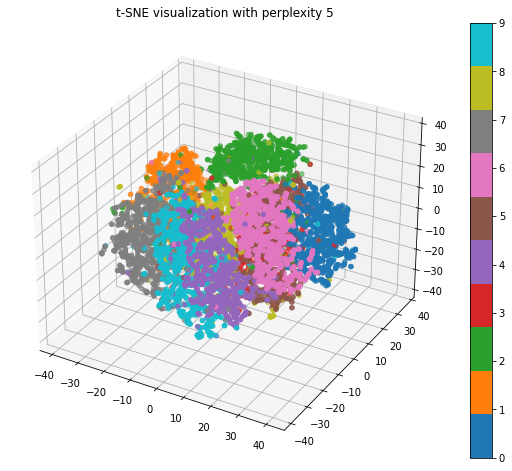

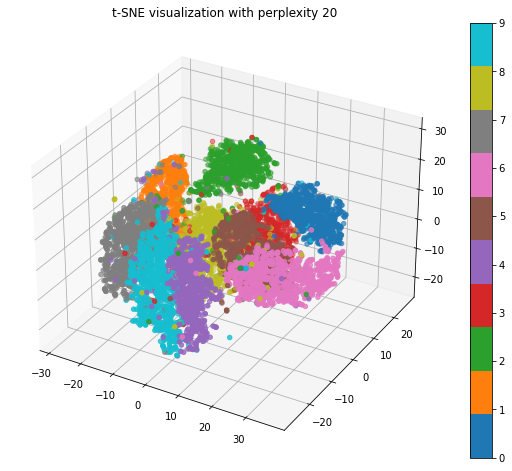

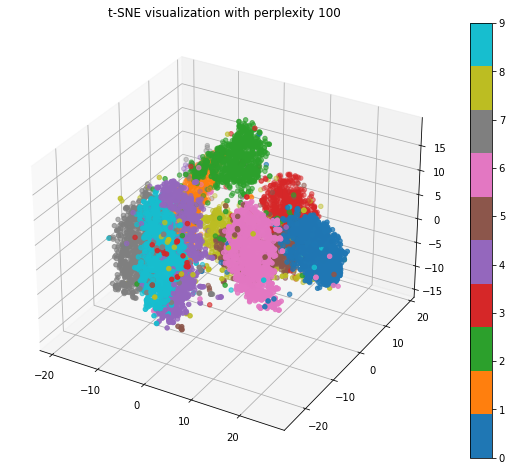

In [ ]:
perplexities = [5, 20, 100]

for perplexity in perplexities:
    tsne = TSNE(n_components = 3, perplexity = perplexity, random_state = 42)
    X_emb = tsne.fit_transform(X_sub)

    # Visualize data
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    scatter = ax.scatter(X_emb[:, 0], X_emb[:, 1], X_emb[:, 2], c = y_sub, cmap = 'tab10')
    plt.title(f't-SNE visualization with perplexity {perplexity}')
    plt.colorbar(scatter)
    plt.show()

# 20NG

In [2]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\s+\w{1}\s+', '', text)
    return text

def preprocessor(text):
    text = clean_text(text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    tokens = [porter.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Apply the preprocessor to the training data
X_train = [preprocessor(text) for text in newsgroups_train.data]
y_train = newsgroups_train.target

# Apply the preprocessor to the test data
X_test = [preprocessor(text) for text in newsgroups_test.data]
y_test = newsgroups_test.target

In [4]:
X_train = np.array(X_train)

In [11]:
# Choosing a subset of the data to visualize
num_samples = 7500
indices = np.random.choice(len(X_train), size=num_samples, replace = False)
X_train_sub = X_train[indices]
y_train_sub = y_train[indices]

In [12]:
X_test = np.array(X_test)

In [13]:
 # Choosing a subset of the data to visualize
num_samples = 7500
indices = np.random.choice(len(X_test), size=num_samples, replace = False)
X_test_sub = X_test[indices]
y_test_sub = y_test[indices]

In [14]:
# Define the TF-IDF vectorizer and fit it on the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_sub)

In [15]:
X_test = vectorizer.transform(X_test_sub)

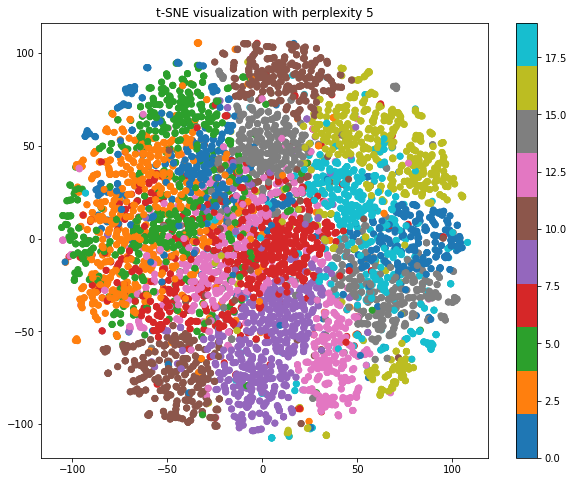

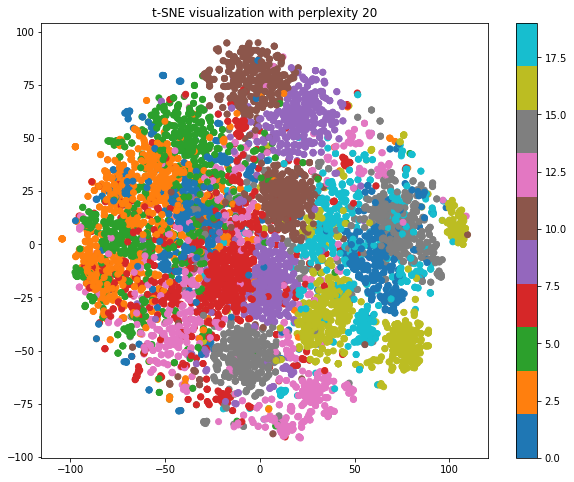

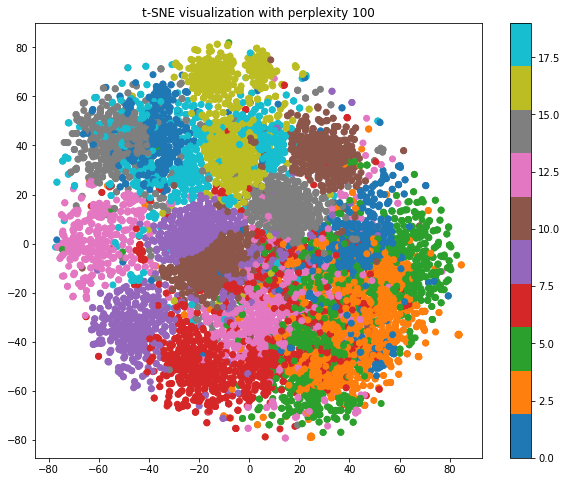

In [ ]:
perplexities = [5, 20, 100]

for perplexity in perplexities:
    tsne = TSNE(n_components = 2, perplexity = perplexity, init = 'pca', random_state = 42)
    X_emb_ng = tsne.fit_transform(X_train.toarray())

    # Visualizing data
    plt.figure(figsize=(10, 8))
    plt.scatter(X_emb_ng[:, 0], X_emb_ng[:, 1], c = y_train_sub, cmap ='tab10')
    plt.title(f't-SNE visualization with perplexity {perplexity}')
    plt.colorbar()
    plt.show()

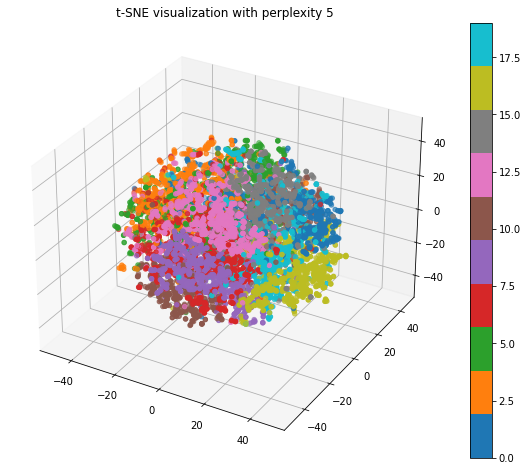

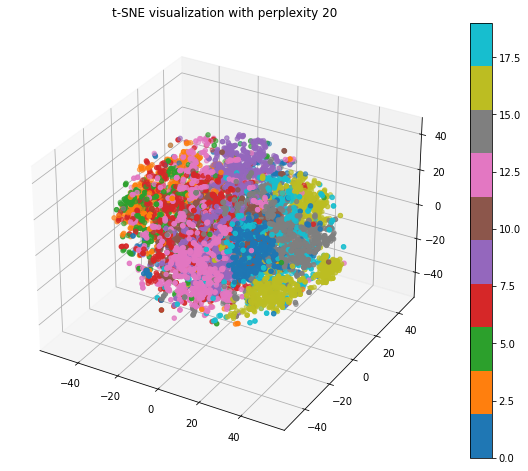

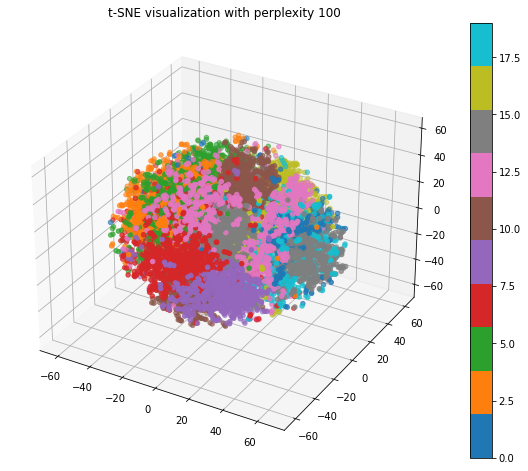

In [ ]:
perplexities = [5, 20, 100]

for perplexity in perplexities:
    tsne = TSNE(n_components = 3, perplexity = perplexity, init = 'pca', random_state = 42)
    X_emb_ng = tsne.fit_transform(X_train.toarray())

    # Visualizing data
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection = '3d')
    scatter = ax.scatter(X_emb_ng[:, 0], X_emb_ng[:, 1], X_emb_ng[:, 2], c = y_train_sub, cmap = 'tab10')
    plt.title(f't-SNE visualization with perplexity {perplexity}')
    plt.colorbar(scatter)
    plt.show()

# PROBLEM 2 : Pairwise Feature selection for text

In [10]:
k = 200
selector = SelectKBest(chi2, k=k)
X_train_new = selector.fit_transform(X_train, y_train_sub)
X_test_new = selector.transform(X_test)

In [24]:
feature_indices = selector.get_support(indices=True)

In [25]:
feature_names = [feature for feature, index in vectorizer.vocabulary_.items() if index in feature_indices]
print(feature_names)

['jesu', 'christ', 'coach', 'team', 'playoff', 'nhl', 'hockey', 'play', 'game', 'season', 'cup', 'keith', 'player', 'leagu', 'goali', 'ranger', 'sale', 'secur', 'offer', 'key', 'driver', 'file', 'space', 'govern', 'wiretap', 'chip', 'sternlight', 'nsa', 'escrow', 'encrypt', 'algorithm', 'xr', 'christian', 'drive', 'car', 'card', 'dx', 'religion', 'imag', 'god', 'monitor', 'xterm', 'window', 'isra', 'israel', 'occupi', 'soldier', 'lebanes', 'wing', 'bike', 'dod', 'bmw', 'orbit', 'win', 'clipper', 'gay', 'homosexu', 'moral', 'church', 'se', 'detroit', 'motif', 'jewish', 'jew', 'arab', 'palestinian', 'dyer', 'mac', 'atf', 'appl', 'font', 'secret', 'disk', 'ship', 'clinton', 'livni', 'bank', 'gordon', 'medic', 'njxp', 'chastiti', 'intellect', 'gun', 'handgun', 'weapon', 'firearm', 'fire', 'diseas', 'sin', 'leaf', 'waco', 'philli', 'brave', 'pitch', 'basebal', 'alomar', 'obo', 'pat', 'cview', 'pitcher', 'schneider', 'do', 'graphic', 'nl', 'launch', 'sox', 'iisi', 'sho', 'nasa', 'shuttl', 'p

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='lbfgs', max_iter = 100)
clf.fit(X_train_new, y_train_sub)

In [27]:
# Make predictions on the test data
y_pred = clf.predict(X_test_new)

# Calculate the accuracy
accuracy = accuracy_score(y_test_sub, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 62.44


In [26]:
k = 200
selector = SelectKBest(mutual_info_classif, k=k)
X_train_new = selector.fit_transform(X_train, y_train_sub)
X_test_new = selector.transform(X_test)

In [17]:
feature_indices = selector.get_support(indices=True)

In [18]:
feature_names = [feature for feature, index in vectorizer.vocabulary_.items() if index in feature_indices]
print(feature_names)

['david', 'subject', 'keyword', 'organ', 'line', 'though', 'may', 'note', 'govern', 'use', 'current', 'technolog', 'go', 'end', 'long', 'email', 'let', 'one', 'question', 'ask', 'mani', 'other', 'sinc', 'right', 'would', 'also', 'read', 'system', 'without', 'need', 'us', 'power', 'includ', 'servic', 'make', 'avail', 'better', 'law', 'even', 'everi', 'day', 'work', 'well', 'point', 'start', 'get', 'possibl', 'doesnt', 'order', 'commun', 'still', 'abl', 'tri', 'person', 'place', 'great', 'inform', 'much', 'window', 'world', 'nntppostinghost', 'articl', 'write', 'say', 'enough', 'messag', 'ive', 'could', 'anyon', 'idea', 'might', 'happen', 'sure', 'your', 'run', 'real', 'univers', 'opinion', 'like', 'peopl', 'give', 'cours', 'dont', 'think', 'seen', 'kind', 'thing', 'someon', 'state', 'group', 'way', 'im', 'didnt', 'anyth', 'new', 'christian', 'els', 'want', 'talk', 'seem', 'version', 'come', 'differ', 'pleas', 'post', 'research', 'chang', 'look', 'help', 'problem', 'comput', 'put', 'time

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100000, random_state = 42)
clf.fit(X_train_new, y_train_sub)

In [29]:
# Make predictions on the test data
y_pred = clf.predict(X_test_new)

# Calculate the accuracy
accuracy = accuracy_score(y_test_sub, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 34.92


# PROBLEM 3 : L1 feature selection on text

In [21]:
# Fitting a lasso regression and selecting top 200 features
model = Lasso(alpha = 0.002)
model.fit(X_train, y_train_sub)
coef_abs = abs(model.coef_)
top_200_feature_indices = coef_abs.argsort()[::-1][:200]

In [22]:
feature_names = np.asarray(vectorizer.get_feature_names_out())[top_200_feature_indices]
print(feature_names)

['wingat' 'atheist' 'graphic' 'keith' 'beauchain' 'benedikt' 'christian'
 'atheism' 'gun' 'window' 'livesey' 'file' 'health' 'thank' 'isra'
 'israel' 'germani' 'armenian' 'govern' 'gregg' 'schneider' 'islam'
 'polygon' 'space' 'greek' 'presid' 'clinton' 'orbit' 'imag' 'fbi'
 'bissel' 'mac' 'blood' 'jew' 'articl' 'car' 'drug' 'drive' 'appl'
 'driver' 'conner' 'bobbi' 'ten' 'csutexasedu' 'frank' 'waco' 'church'
 'weapon' 'libertarian' 'rushdi' 'curv' 'peopl' 'homosexu' 'studi' 'burn'
 'jon' 'food' 'rosicrucian' 'tiff' 'clayton' 'format' 'write' 'code' 'hi'
 'fire' 'card' 'man' 'quot' 'serdar' 'medic' 'packag' 'gay' 'us' 'problem'
 'jesu' 'sphere' 'omnipot' 'may' 'public' 'sale' 'tax' 'moon' 'weiss'
 'upgrad' 'run' 'do' 'cathol' 'set' 'radio' 'alicea' 'monitor' 'launch'
 'mous' 'said' 'feder' 'see' 'area' 'simm'
 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax' 'god' 'port' 'version' 'atf' 'kaldi'
 'pat' 'anim' 'mr' 'email' 'law' 'help' 'polit' 'vesa' 'surfac'
 'nntppostinghost' 'forc' 'kill' 'keyword' 

In [23]:
X_train_feature = X_train[:, top_200_feature_indices]
X_test_feature = X_test[:, top_200_feature_indices]

In [ ]:
# Training a classifier on the selected features
clf_feature = LogisticRegression(max_iter = 100000, random_state = 42, solver = 'saga')
clf_feature.fit(X_train_feature, y_train_sub)

In [25]:
# Evaluating performance of the classifier on the testing set
y_pred = clf_feature.predict(X_test_feature)
accuracy = accuracy_score(y_test_sub, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 55.22666666666667


# PROBLEM 4 HARR features for MNIST

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from mnist import MNIST
import numpy as np

mnist_loader = MNIST("/content/drive/MyDrive/MNIST")
mnist_loader.gz = True
X_train, y_train = mnist_loader.load_training()
X_test, y_test = mnist_loader.load_testing()
X_train = np.array(X_train, dtype='float32') / 255
y_train = np.array(y_train, dtype='int16')
X_test = np.array(X_test, dtype='float32') / 255
y_test = np.array(y_test, dtype='int16')

In [14]:
def compute_black(X, print_iterval):
    
    # init
    black = []
    
    for idx in range(X.shape[0]):
        
        # init
        b = np.empty((28,28))
            
        # Reshape image
        x = X[idx].reshape((28,28))
        
        b[0, 0] = 1 if x[0, 0] == 0 else 0
        
        # Base case
        for i in range(1, 28):
            t = b[0, i - 1]
            b[0, i] = t + 1 if x[0, i] == 0 else t
            
        # Recursive
        for i in range(1, 28):
            for j in range(28):
                if j == 0:
                    t = b[i - 1, j]
                    b[i, j] = t + 1 if x[i, j] == 0 else t
                else:
                    t = b[i - 1, j] + b[i, j - 1] - b[i - 1, j - 1]
                    b[i, j] = t + 1 if x[i, j] == 0 else t
                    
        black.append(b)
        
    return np.array(black, dtype = 'int')

In [15]:
k = 100
np.random.seed(42)
rect = []

while len(rect) != k:
    
    # Randomly pick top left point, length, and breadth
    tl = np.random.randint(low = 5, high = 23, size = 2)
    b = np.random.randint(low = 5, high = 28 - tl[1])
    l = np.random.randint(low = 5, high = 28 - tl[0])
    if b * l < 130 or b * l > 170:
        continue
    
    # Other corners
    tr = np.array([tl[0] + l, tl[1]])
    bl = np.array([tl[0], tl[1] + b])
    br = np.array([tl[0] + l, tl[1] + b])
    
    # Mid points
    vt = np.array([tl[0] + l//2, tl[1]])
    vb = np.array([tl[0] + l//2, bl[1]])
    hl = np.array([tl[0], tl[1] + b//2])
    hr = np.array([tr[0], tr[1] + b//2])

    rect.append([tl, tr, bl, br, vt, vb, hl, hr])

In [16]:
def HAAR(X, b, print_interval):
    _X = np.empty((X.shape[0], 200), dtype = 'int16')
    for i in range(X.shape[0]):
        
        # Extract image
        img = b[i]
        
        # Compute features
        for j in range(k):
            tl, tr, bl, br, vt, vb, hl, hr = rect[j]
            
            top = img[hr[0], hr[1]] - img[hl[0], hl[1]] - img[tr[0], tr[1]] + img[tl[0], tl[1]]
            bottom = img[br[0], br[1]] - img[bl[0], bl[1]] - img[hr[0], hr[1]] + img[hl[0], hl[1]]
            v_score = top - bottom
            
            left = img[vb[0], vb[1]] - img[bl[0], bl[1]] - img[vt[0], vt[1]] + img[tl[0], tl[1]]
            right = img[br[0], br[1]] - img[vb[0], vb[1]] - img[tr[0], tr[1]] + img[vt[0], vt[1]]
            h_score = left - right

            _X[i][j*2] = v_score
            _X[i][(j*2)+1] = h_score

    return _X

In [17]:
X_train_b = compute_black(X_train, 10000)

In [18]:
X_test_b = compute_black(X_test, 1000)

In [19]:
train_data = HAAR(X_train, X_train_b, 10000)
test_data = HAAR(X_test, X_test_b, 1000)

In [24]:
# Train the decision tree model
clf_dt = DecisionTreeClassifier(random_state = 42, max_depth = 30)
clf_dt.fit(train_data, y_train)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [25]:
# Calculate the accuracy on the test set
y_pred = clf.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 91.69
